In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data for the hero 'EarthShaker'
es = pd.read_csv('ES_data.csv', usecols=[0,1,2,3,4,5,6,7,8])

In [3]:
es.head()

,lane,last_hits,denies,gold_per_min,xp_per_min,tower_damage,hero_damage,hero_healing,dmg_dealt
0,1,205,1,407,597,1417,44183,125,44183
1,1,259,17,516,734,2642,43511,0,43511
2,3,197,0,377,498,467,43333,100,43333
3,1,265,2,356,449,367,39514,0,39514
4,1,256,6,405,664,228,39060,0,39060


In [4]:
es.isnull().sum()

lane            0
last_hits       0
denies          0
gold_per_min    0
xp_per_min      0
tower_damage    0
hero_damage     0
hero_healing    0
dmg_dealt       0
dtype: int64

In [5]:
es.shape

(200, 9)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_style('darkgrid')
sns.set_context('talk')

In [8]:
# Create a dataframe for the count of games played in different lanes for easier plotting and editing
lane = pd.DataFrame(es['lane'].value_counts()).reset_index()

In [9]:
lane.head()

,index,lane
0,1,92
1,3,82
2,2,23
3,5,3


In [10]:
lane.columns = ['lane', 'game_count']

In [11]:
lane.sort_values('lane', inplace=True)
lane

,lane,game_count
0,1,92
2,2,23
1,3,82
3,5,3


In [12]:
# Replace the numbers in lanes with their actual meaning
lane['lane'].replace({1:'Safe',2:'Mid',3:'Off',5:'Jungle'}, inplace=True)

In [13]:
lane.head()

,lane,game_count
0,Safe,92
2,Mid,23
1,Off,82
3,Jungle,3


[Text(0,0.5,'# Games'), Text(0.5,0,'Lane')]

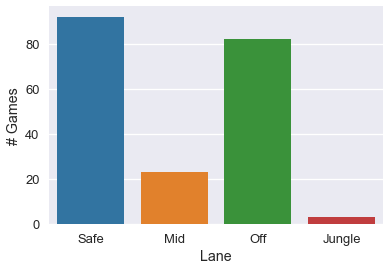

In [14]:
ax = sns.barplot(x='lane',y='game_count',data=lane)
ax.set(xlabel='Lane', ylabel='# Games')

In [15]:
# Above bar-chart shows that Earthshaker is mostly played in safe-lane and off-lane

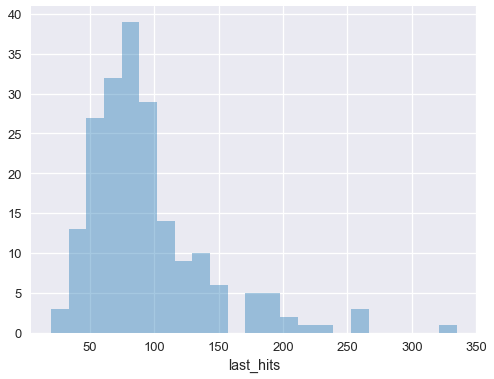

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(es['last_hits'], kde=False)

In [17]:
# Above histogram shows that most earthshaker players have last hits between 50 and 100
# It can also be observed that very small percentage of games had ES's last hits above 250

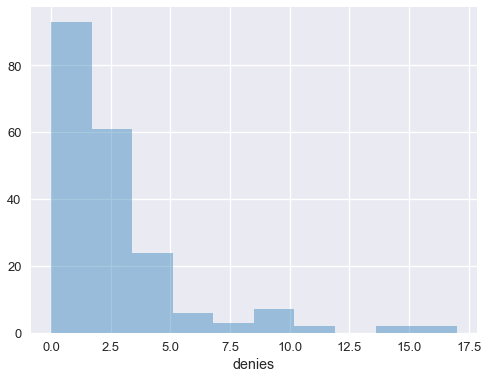

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(es['denies'], kde=False, bins=10)

In [19]:
# Most ES players have denies between 0 and 3

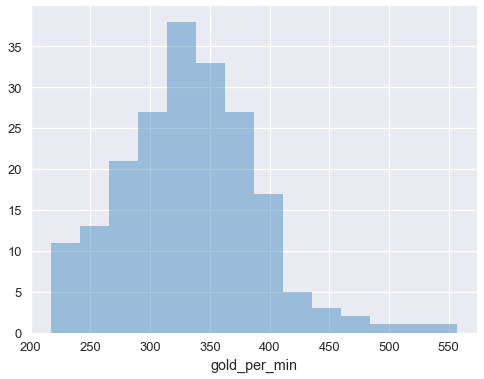

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(es['gold_per_min'], kde=False)

In [21]:
# Above histogram shows that most earthshakers have GPM between 325 and 375 with very few above 500

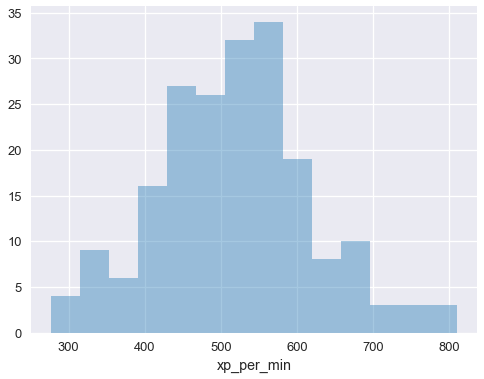

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(es['xp_per_min'], kde=False)

In [23]:
# The distribution of XPM is similar to a normal distribution with majority being between 500 and 600

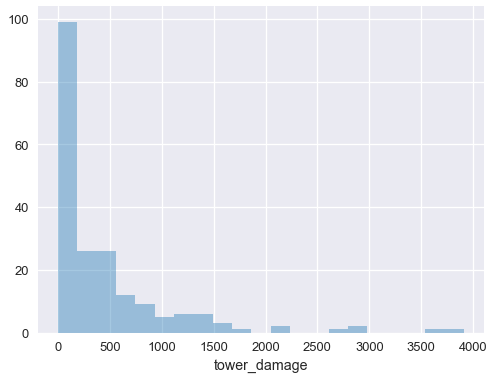

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(es['tower_damage'], kde=False)

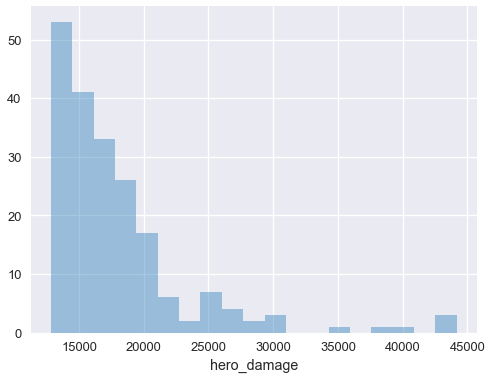

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(es['hero_damage'], kde=False)

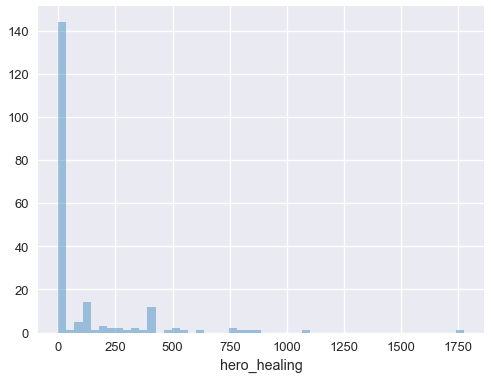

In [26]:
plt.figure(figsize=(8,6))
sns.distplot(es['hero_healing'], kde=False)

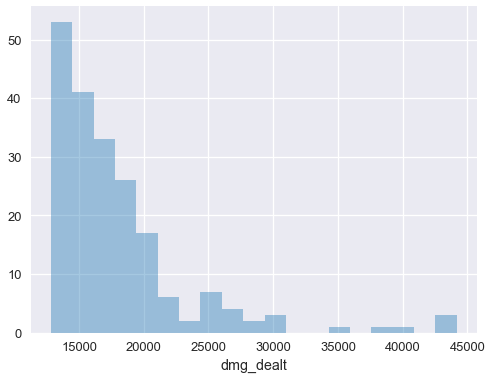

In [28]:
plt.figure(figsize=(8,6))
sns.distplot(es['dmg_dealt'], kde=False)

In [29]:
# From above graphs it can be seen that most ES deals very less damage (hero, tower and total)

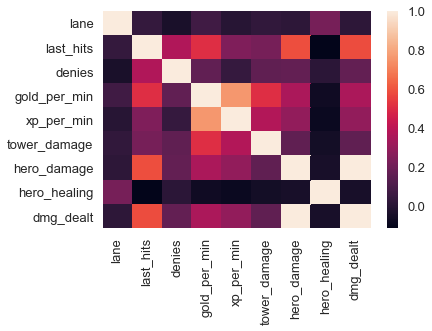

In [30]:
sns.heatmap(es.corr())

In [31]:
# From above heatmap we can see that last hits is correlated with hero damage and total damage
# gold per minute is highly correlated with xp per minute and moderately correlated with last hits and tower damage
# hero damage is very highly correlated with overall damage dealt

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaled_es = scaler.fit_transform(es)
scaled_es[:5]

array([[-9.92534134e-01,  2.33524529e+00, -5.34586002e-01,
         1.29093857e+00,  7.79878711e-01,  1.56401709e+00,
         4.71166171e+00,  1.12820380e-01,  4.71140702e+00],
       [-9.92534134e-01,  3.47346395e+00,  4.91342421e+00,
         3.18733080e+00,  2.13912282e+00,  3.49125088e+00,
         4.59108206e+00, -4.41089576e-01,  4.59082378e+00],
       [ 1.00250935e+00,  2.16662030e+00, -8.75086641e-01,
         7.68995750e-01, -2.02348786e-01,  6.94276141e-02,
         4.55914280e+00,  2.03838864e-03,  4.55888357e+00],
       [-9.92534134e-01,  3.59993269e+00, -1.94085364e-01,
         4.03635778e-01, -6.88501789e-01, -8.78975935e-02,
         3.87388431e+00, -4.41089576e-01,  3.87360471e+00],
       [-9.92534134e-01,  3.41022958e+00,  1.16791719e+00,
         1.25614238e+00,  1.44461853e+00, -3.06579632e-01,
         3.79242127e+00, -4.41089576e-01,  3.79213925e+00]])

In [35]:
# We will use elbow method to identify appropriate number of clusters

kmeans_kwargs = {'init': 'k-means++',
                'n_init': 10,
                'max_iter': 300,
                'random_state': 101}

# Compute within cluster sum-square error for each iteration
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_es)
    wcss.append(kmeans.inertia_)

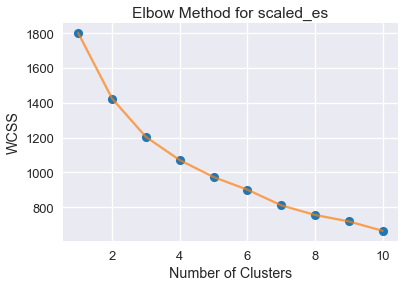

In [36]:
plt.plot(range(1, 11), wcss, 'o')
plt.plot(range(1, 11), wcss, '-', alpha=0.7)
plt.title('Elbow Method for scaled_es')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# Optimal number of clusters = 5 which is also the actual number of roles in DOTA2 (carry, midlaner, offlaner, soft-support and
# hard-support)

In [38]:
model = KMeans(n_clusters=5, **kmeans_kwargs)

In [39]:
pred = model.fit_predict(scaled_es)
pred[:5]

array([2, 2, 2, 2, 2])

In [41]:
pred

array([2, 2, 2, 2, 2, 2, 1, 4, 3, 2, 1, 3, 1, 1, 2, 1, 1, 0, 0, 0, 3, 3,
       3, 3, 3, 1, 3, 1, 4, 1, 4, 3, 0, 1, 3, 0, 1, 3, 3, 0, 3, 1, 3, 3,
       1, 4, 1, 0, 0, 3, 3, 3, 3, 0, 1, 3, 0, 1, 3, 0, 3, 1, 0, 3, 1, 0,
       0, 0, 0, 0, 3, 1, 1, 3, 1, 1, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 1, 3,
       0, 3, 4, 4, 0, 1, 4, 0, 0, 3, 0, 0, 4, 3, 1, 0, 0, 1, 3, 0, 3, 3,
       3, 3, 0, 1, 0, 1, 0, 1, 1, 0, 3, 3, 1, 0, 0, 0, 0, 3, 0, 3, 0, 4,
       4, 3, 4, 0, 1, 3, 3, 0, 3, 0, 1, 0, 3, 4, 1, 0, 4, 0, 0, 3, 3, 3,
       0, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 1, 0, 0, 0, 0,
       0, 0, 4, 0, 4, 1, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 4, 3, 0, 0,
       4, 0])

In [43]:
es['predicted_roles'] = pred

In [44]:
es.head()

,lane,last_hits,denies,gold_per_min,xp_per_min,tower_damage,hero_damage,hero_healing,dmg_dealt,predicted_roles
0,1,205,1,407,597,1417,44183,125,44183,2
1,1,259,17,516,734,2642,43511,0,43511,2
2,3,197,0,377,498,467,43333,100,43333,2
3,1,265,2,356,449,367,39514,0,39514,2
4,1,256,6,405,664,228,39060,0,39060,2


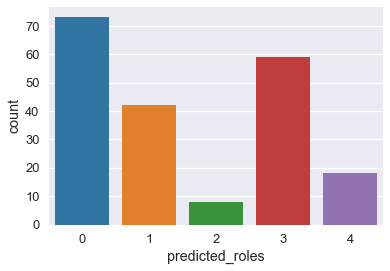

In [93]:
sns.countplot(es['predicted_roles'])

In [94]:
# Clusters 0 and 3 have most of the instances indicating majority of earthshakers belong to these cluster's roles 

In [65]:
clusters = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']

In [72]:
lasthits_clusters = []
for i in range(5):
    lasthits_clusters.append(round(es[es['predicted_roles']==i]['last_hits'].mean()))

In [73]:
lasthits_clusters

[75, 104, 240, 97, 77]

[Text(0,0.5,'Avg Last Hits'), Text(0.5,0,'Clusters')]

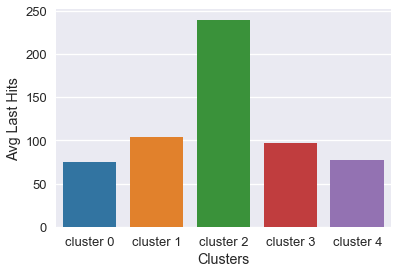

In [86]:
ax = sns.barplot(x=clusters, y=lasthits_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Last Hits')

In [75]:
# It can be seen that cluster 2 Earthshakers have significantly higher last hits

In [76]:
denies_clusters = []
for i in range(5):
    denies_clusters.append(round(es[es['predicted_roles']==i]['denies'].mean()))

In [77]:
denies_clusters

[2, 2, 7, 2, 3]

[Text(0,0.5,'Avg Denies'), Text(0.5,0,'Clusters')]

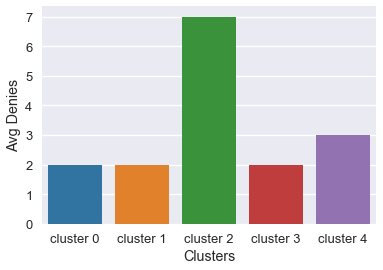

In [87]:
ax = sns.barplot(x=clusters, y=denies_clusters)
ax.set(xlabel='Clusters', ylabel='Avg Denies')

In [79]:
# It can be seen that cluster 2 Earthshakers have maximum denies followed by cluster 4

In [80]:
gpm_clusters = []
for i in range(5):
    gpm_clusters.append(round(es[es['predicted_roles']==i]['gold_per_min'].mean()))

In [81]:
gpm_clusters

[290, 386, 437, 343, 305]

[Text(0,0.5,'Avg GPM'), Text(0.5,0,'Clusters')]

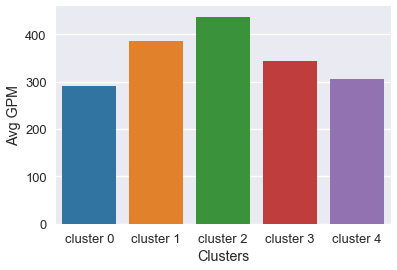

In [88]:
ax = sns.barplot(x=clusters, y=gpm_clusters)
ax.set(xlabel='Clusters', ylabel='Avg GPM')

In [83]:
# Cluster 2 Earthshakers have the highest gpm followed by cluster 1 indicating that cluster 2 have highest farm priority
# Followed by cluster 1 then cluster 3 whereas cluster 0 and cluster 4 have almost equal farm priority

In [89]:
xpm_clusters = []
for i in range(5):
    xpm_clusters.append(round(es[es['predicted_roles']==i]['xp_per_min'].mean()))

In [90]:
xpm_clusters

[454, 623, 622, 529, 454]

[Text(0,0.5,'Avg XPM'), Text(0.5,0,'Clusters')]

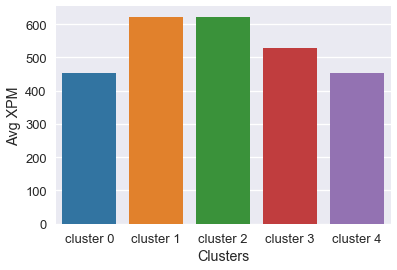

In [91]:
ax = sns.barplot(x=clusters, y=xpm_clusters)
ax.set(xlabel='Clusters', ylabel='Avg XPM')

In [92]:
# It can be seen that clusters 1 and 2 have almost same xpm
# Which means teams prioritize ES's xpm priority equally in these 2 roles

In [63]:
hero_dmg_clusters = []
for i in range(5):
    hero_dmg_clusters.append(round(es[es['predicted_roles']==i]['hero_damage'].mean()))

In [64]:
hero_dmg_clusters

[15888, 18762, 37525, 17583, 16639]

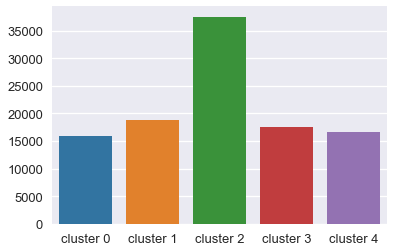

In [66]:
sns.barplot(x=clusters, y=hero_dmg_clusters)

In [67]:
# It can be seen that cluster 2 Earthshakers deals significantly higher hero damage